<a href="https://colab.research.google.com/github/mukeshsharma1981/ML-Projects/blob/main/2_ML_LogisticRegression_without_Optimization_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use Seed_Data. 

Consider the column target as the output variable and the remaining columns as input variables. Accomplish the classification task using logistic regression. 

To do so:

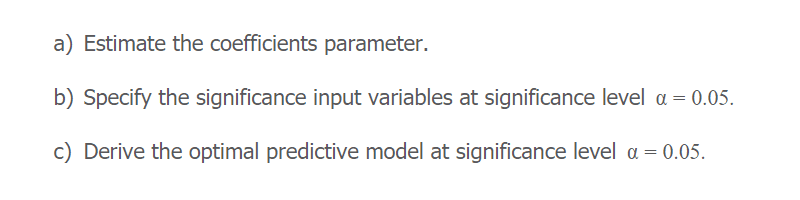

In [ ]:
import pandas as pd


dataset=pd.read_csv("/content/Seed_Data.csv")
dataset.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
import warnings
warnings.simplefilter("ignore")


In [ ]:
X=dataset.drop("target", axis=1)
y=dataset["target"]

## fit the LogisticRegression on X and y
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,y)


LogisticRegression()

In [ ]:
# a) paramert estimation

cf=model.coef_[0]

pd.DataFrame(cf, X.columns, columns=["coef"])

,coef
A,0.051148
P,0.581061
C,0.120364
LK,1.306770
WK,0.232930
A_Coef,-0.559869
LKG,-2.849231


In [ ]:
# b) p.values
from sklearn.feature_selection import chi2

scores, pvalues = chi2(X,y)
pvalues

array([1.70334569e-22, 3.44011725e-05, 9.72062750e-01, 6.33878884e-02,
       2.60859793e-02, 5.50776926e-10, 2.61212799e-02])

Looking at the pvalues and alpha, we can say that variable [C] is not significantly different and can be excluded from the feature selection

In [ ]:
## AGain we are doing the above task removing Variable [C] & [LK]

X1=dataset.drop(["target","C","LK"], axis=1)
y1=dataset["target"]

## fit the LogisticRegression on X and y
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X1,y1)

LogisticRegression()

In [ ]:
# a) paramert estimation

cf=model.coef_[0]

pd.DataFrame(cf, X1.columns, columns=["coef"])

,coef
A,0.442288
P,-0.420209
WK,-0.052621
A_Coef,-0.671726
LKG,-1.898205


In [ ]:
# b) p.values
from sklearn.feature_selection import chi2

scores, pvalues = chi2(X1,y1)
pvalues

array([1.70334569e-22, 3.44011725e-05, 2.60859793e-02, 5.50776926e-10,
       2.61212799e-02])

# c) predictive model at significanct level alpha= 0.05

thati = 0.442288*A + -0.420209*P + 	-0.052621*WK + -0.671726*A_Coef + -1.898205*LKG

phati = 1/(i+e)-thati

## yhati = 1 if phati >= 0.5
## yhati = 0 if phati < 0.5
